# Heart Failure Analysis/Visualization


## By  Oby Ajah

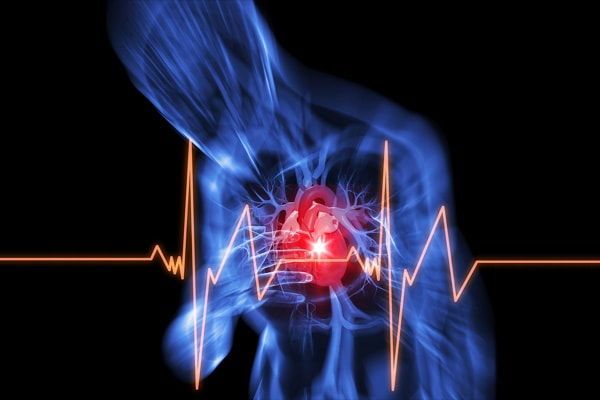

# Problem Statement


### Background

***
Cardiovascular diseases (CVDs) account for number one cause of death globally; WHO estimates that 17.9 million lives are lost each year as a result of CVD-related cases, this accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs; global efforts are to reduce complications and deathrates associated with CVDs. Behavioural changes like reduced intake of tobacco, increased involvements in physical activities, improved dieting, reduced intake of alcohol have been identified as ways of managing /reducing CVDs. St. Peter's Hospital patients' records with CVDs have identified one or more of these factors (diabetes, high blood pressure, smoking, ejection fraction, anaemia, serum creatinine, creatine phosphokinase among others) as indicators of heart failures and possibly death. 

As a recently hired Data Analyst of St. Peter's Hospital, you have been tasked to identifiy the relationships between these factors, and the possibilty of their leading to the development of heart failure and possibly death. The stakeholders will be present to listen to your findings as this will help in chanelling funds and efforts to the control of rapid heart failure cases hence, aid the decrease of death rates. 
***


## Objectives

* To carry out exploratory data analysis on the dataset
* To carry out directional hypothesis testing and how likely they are to lead to patients' death
* To create visualizations to illustrate the relationships between selected health-related metrics


## Dataset

***
The dataset was gotten from Kaggle.com; it contains health records of 299 patients with 12 health-related metrics and death event flag. Listed below are the health-related metrics contained in the dataset.


* age: Patient's age
* anaemia: Whether the patient is anaemic or not (given as 0=non-anaemic or 1=anaemic)
* creatine_phosphokinase: The amount of creatine phophokinase in a patient's blood
* diabetes: Whether the patient is diabetic or not (given as 0=non-diabetic or 1=diabetic)
* ejection_fraction: The amount of blood pumped in and out of the heart ventricle of a patient
* high_blood_pressure: Whether the patient has high bloo pressure or not (given as 0=don't have HBP or 1=has HBP)
* platelets: The platelet count in the blood of the patient
* serum_creatinine: The level of serum creatinine level in the patient's blood
* serum _sodium: The serum sodium concentration in the patient's blood
* sex: The gender of the patient(given as 0=male or 1=female)
* smoking: Whether the patient is a smoker or not (given as 0=non-smoker or 1=smoker)
* time: The number of hours it takes for the patient to deteroriate 
* DEATH_EVENT: whether the patient succumb to their ailment (given as 0=alive or 1=dead)
***

## Definition of Some Important Features

* <a href="https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646#:~:text=The%20typical%20range%20for%20serum,52.2%20to%2091.9%20micromoles%2FL" target=" _blank">Serum Creatinine</a>
* <a href="https://www.healthline.com/health/sodium-blood" target=" _blank">Serum Sodium</a>
* <a href="https://www.pennmedicine.org/updates/blogs/heart-and-vascular-blog/2022/april/ejection-fraction-what-the-numbers-mean#:~:text=Ejection%20fraction%20(EF)%20is%20a,pumped%20out%20with%20each%20heartbeat." target=" _blank">Ejection Fraction</a>
* <a href="https://www.hopkinslupus.org/lupus-tests/clinical-tests/creatine-phosphokinase-cpk/" target=" _blank">Creatine Phosphokinase</a>

## Importing necessary libraries

In [1]:
#Libraries that help in reading and manipulating data
import numpy as np
import pandas as pd 

#Libraries that help in data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ^^^ pyforest auto-imports - don't write above this line

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

## Reading the dataset

In [2]:
#Save filepath to a variable for easy assess
heart_records_path = "C:/Users/obyaj/.jupyter/heart_failure_clinical_records_dataset.csv"

#Read and store the data in dataframe titled heart_records_data
heart_records_data = pd.read_csv(heart_records_path)

## Overview of the dataset

### View the first and last 5 rows of the dataset

In [4]:
#Print the first five rows of the dataset
heart_records_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


* 5 rows, 13 columns

In [5]:
#Print the last five rows of the dataset
heart_records_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


* 5 rows, 13 columns

## Understand the shape of the dataset

In [6]:
#Print the shape of the dataset
heart_records_data.shape

(299, 13)

* The dataset contains 299 rows and 13 columns

## Check if there are any duplicate rows in the dataset

In [8]:
heart_records_data.duplicated().any()

False

* No duplicate rows available

## Check the data type of the columns of the dataset

In [9]:
heart_records_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Observations:

* There are no null values contained in the dataset
* There are 10 integers and 3 floats in the dataset
   
   **To achieve uniformity in the dataset, the "floats" will be converted to "integers"**


## Fixing the data types

In [10]:
#Identify the columns with "float" data types
cols = heart_records_data.select_dtypes(['float64'])
cols.columns 

Index(['age', 'platelets', 'serum_creatinine'], dtype='object')

In [12]:
#Convert the "float" data types to "integers"
for i in cols.columns:
    heart_records_data[i] = heart_records_data[i].astype('int64')

In [13]:
#Check if the conversion has taken place
heart_records_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       299 non-null    int64
 1   anaemia                   299 non-null    int64
 2   creatinine_phosphokinase  299 non-null    int64
 3   diabetes                  299 non-null    int64
 4   ejection_fraction         299 non-null    int64
 5   high_blood_pressure       299 non-null    int64
 6   platelets                 299 non-null    int64
 7   serum_creatinine          299 non-null    int64
 8   serum_sodium              299 non-null    int64
 9   sex                       299 non-null    int64
 10  smoking                   299 non-null    int64
 11  time                      299 non-null    int64
 12  DEATH_EVENT               299 non-null    int64
dtypes: int64(13)
memory usage: 30.5 KB


#### The dataset is now uniformly integer data types

## Get the summary of the dataset

In [14]:
#Get the statistical information about the dataset
heart_records_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.829431,11.894997,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.026756,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,0.979933,1.098931,0.0,0.0,1.0,1.0,9.0
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


* 13 rows, 8 columns

### Observations:

* Age of the patients range from 40 years to 95 years; though the avearge age of the patients is 61 years
* Normal platelet count ranges from 150,000 to 450,000 per microliter of blood; from the dataset, 25 % of the patients have a platelet count of 212,500 or below while 75 % of them have platelet count of 303,500 or below. So, majority of the patients have platelet counts that can be considered as normal
* Creatinine phosphokinase values of the patients are relatively high as more than 75 % of them have their creatinine phosphokinase value of more than 250 mcg/L, with the highest value being 7,861 mcg/L. meanwhile the normal creatinine phosphokinase value ranges from 10 to 120 mcg/L.
* Ejection fraction of the patients are low considering that the normal ejection fraction is about 50 % to 70 %
* Serum sodium level of the patients are fairly okay because the normal level of serum sodium in the blood is about 135 to 145 mEq/L 
* Serum creatinine range for adult male is 0.74 to 1.35 mg/dL while adult female has 0.59 to 1.04 mg/dL; however, judging from the dataset, 75 % of the patients have normal ranges of serum creatinine in their blood system 

In [9]:
#Get the statistical relationships between variables
heart_records_data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


* 13 rows, 13 columns

### Observations:

* There is no strong positive correlations among these health metrics
* The least negatively correlated metric to death is diabetes; from the dataset therefore, the probability of diabetes to cause the death of patient is very low. 

In [11]:
#Get the statistical distribution of the variables
cols_cat = heart_records_data.select_dtypes(['int64'])
for i in cols_cat.columns:
    print('Mean of' ,i, 'is:')
    print(cols_cat[i].mean())
    print('Median of' ,i, 'is:')
    print(cols_cat[i].median())
    print('Mode of' ,i, 'is:')
    print(cols_cat[i].mode())
    print('*'*50)
    
    heart_records_data.select_dtypes(exclude="object").nunique()

Mean of anaemia is:
0.431438127090301
Median of anaemia is:
0.0
Mode of anaemia is:
0    0
Name: anaemia, dtype: int64
**************************************************
Mean of creatinine_phosphokinase is:
581.8394648829432
Median of creatinine_phosphokinase is:
250.0
Mode of creatinine_phosphokinase is:
0    582
Name: creatinine_phosphokinase, dtype: int64
**************************************************
Mean of diabetes is:
0.4180602006688963
Median of diabetes is:
0.0
Mode of diabetes is:
0    0
Name: diabetes, dtype: int64
**************************************************
Mean of ejection_fraction is:
38.08361204013378
Median of ejection_fraction is:
38.0
Mode of ejection_fraction is:
0    35
Name: ejection_fraction, dtype: int64
**************************************************
Mean of high_blood_pressure is:
0.3511705685618729
Median of high_blood_pressure is:
0.0
Mode of high_blood_pressure is:
0    0
Name: high_blood_pressure, dtype: int64
*********************************

## Exploring the unique values of all the metrics

In [4]:
#Get the count of unique values in the columns
cols_cat = heart_records_data.select_dtypes(['int64'])
for i in cols_cat.columns:
    print('Unique values in' ,i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in anaemia are :
0    170
1    129
Name: anaemia, dtype: int64
**************************************************
Unique values in creatinine_phosphokinase are :
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
**************************************************
Unique values in diabetes are :
0    174
1    125
Name: diabetes, dtype: int64
**************************************************
Unique values in ejection_fraction are :
35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
65     1
14     1
80     1
70     1
Name: ejection_fraction, dtype: int64
**************************************************
Unique values in high_blood_pressure are :
0    194
1    105
Name: high_blood_pressure, dtype: int64
**************************************************
Unique values in serum_sodium

In [5]:
#Get the number of unique values in the columns
heart_records_data.select_dtypes(exclude="object").nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [6]:
#Get the percentage of missing values per column
heart_records_data.isnull().sum()/heart_records_data.shape[0] *100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

**There are no missing values in the dataset**

## Exploratory Data Analysis

### Univariate Analysis

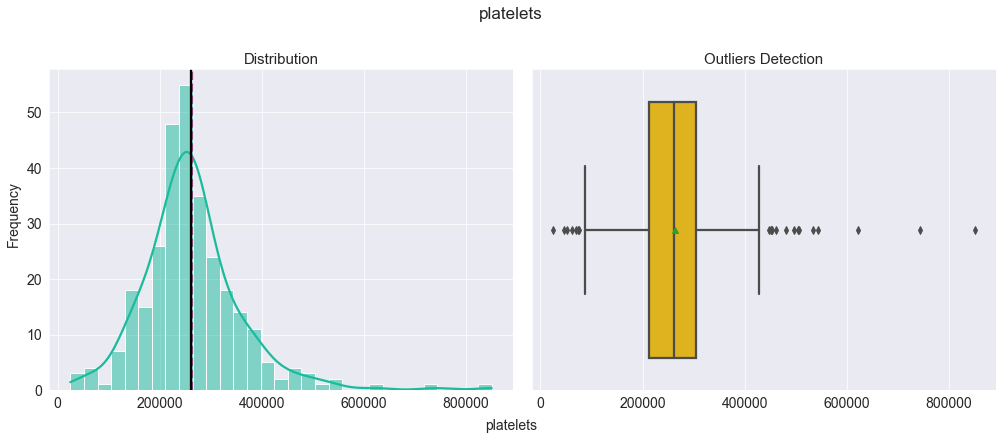

In [10]:
#Get platelets distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("platelets", fontsize=17)
fig.text(0.5, 0.0016, 'platelets', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='platelets', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['platelets']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['platelets']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['platelets'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()                                                                                                                                                                                                                        

### Observations:

* The patients' platelets are almost normally distributed 
* There are outliers in the minimun and maximum axes; meaning that platelets counts of some patients are well below 150,000 and dangerously above 450,000. These extremes are too critical, and can easily lead to death if not controlled on time

**Since there are many outliers, let's investigate the kurtosis of the distribution**

In [12]:
#To find out the skewness and kurtosis of platelets
print('skewness-kurtosis all: {}'.format(heart_records_data['platelets'].kurt()))

skewness-kurtosis all: 6.209254515302208


**The platelets distribution is skewed to the right, and the kurtosis is 3.21 in excess of a normal kurtosis; it, therefore, has a leptokurtic distribution with many outliers of several extreme observations**
* <a href="https://www.scribbr.com/statistics/kurtosis/#:~:text=Kurtosis%20is%20a%20measure%20of,(thin%20tails)%20are%20platykurtic." target=" _blank">Leptokurtic Distribution</a>

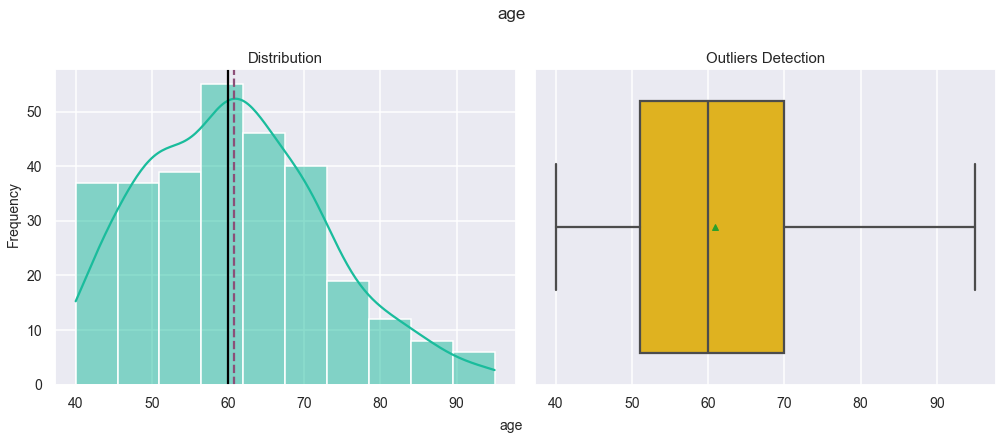

In [13]:
#Get age distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("age", fontsize=17)
fig.text(0.5, 0.0016, 'age', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='age', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['age']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['age']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['age'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

### Observation:

* The age of the patients has no outlier, and has 25th percentile of the patients' age is below 52 years 
* Their ages range from 40 years to 95 years with a mean age of 61 years
* The distribution of their age is flat, and skewed more to the right 

In [14]:
#To find out the skewness and kurtosis of age
print('skewness-kurtosis all: {}'.format(heart_records_data['age'].kurt()))

skewness-kurtosis all: -0.18487053195417413


**The age of the patients is flatly distributed with negative kurtosis of -3.19; it therefore has platykurtic distribution**
* <a href="https://www.scribbr.com/statistics/kurtosis/#:~:text=Kurtosis%20is%20a%20measure%20of,(thin%20tails)%20are%20platykurtic." target=" _blank">Platykurtic Distribution</a>

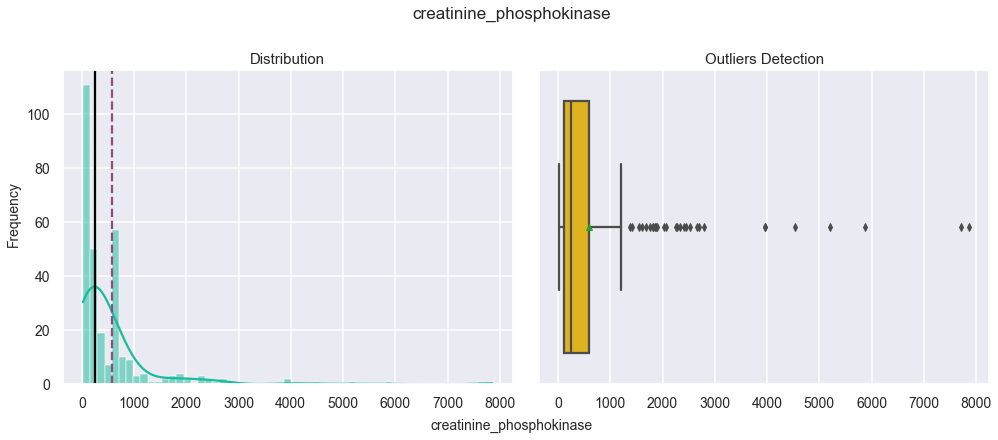

In [15]:
#Get creatinine_phosphokinase distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("creatinine_phosphokinase", fontsize=17)
fig.text(0.5, 0.0016, 'creatinine_phosphokinase', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='creatinine_phosphokinase', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['creatinine_phosphokinase']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['creatinine_phosphokinase']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['creatinine_phosphokinase'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

### Observations:

* The creatinine phosphokinase values of the patients have many outliers at the maximum axis; this means that the creatinine phosphokinase values of some patients are dangerously high
* The 25th to 75th percentile creatinine phosphokinase value is well within 600 
* The creatinine phosphokinase value of patients has exponential distribution

In [16]:
#To find out the skewness and kurtosis of creatinine phosphokinase
print('skewness-kurtosis all: {}'.format(heart_records_data['creatinine_phosphokinase'].kurt()))

skewness-kurtosis all: 25.1490461965808


**The creatinine phosphokinase of the patients is deeply skewed to the right, depicting an exponential distribution; since the kurtosis has an excess of 22.15, it is also leptokurtically distributed**
* <a href="https://www.itl.nist.gov/div898/handbook/eda/section3/eda351.htm" target=" _blank">Exponential Distribution</a>

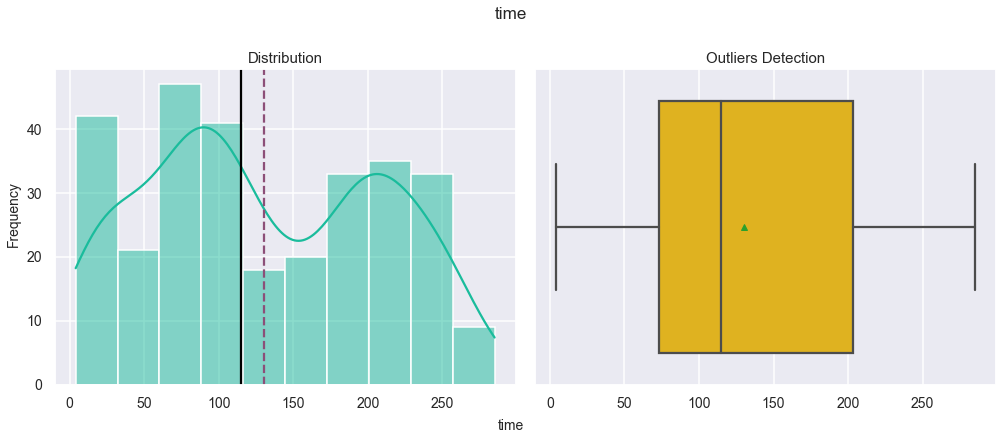

In [17]:
#Get time distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("time", fontsize=17)
fig.text(0.5, 0.0016, 'time', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='time', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['time']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['time']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['time'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

In [18]:
#To find out the skewness and kurtosis of creatinine phosphokinase
print('skewness-kurtosis all: {}'.format(heart_records_data['time'].kurt()))

skewness-kurtosis all: -1.2120479666763422


**Time also has platykurtic distribution**

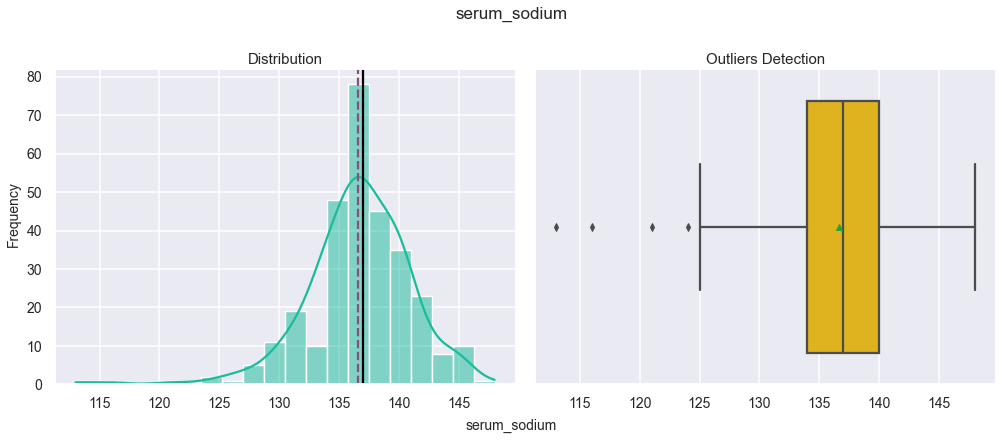

In [20]:
#Get serum sodium distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("serum_sodium", fontsize=17)
fig.text(0.5, 0.0016, 'serum_sodium', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='serum_sodium', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['serum_sodium']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['serum_sodium']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['serum_sodium'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

### Observations:

* Serum sodium levels of patients is fairly noormally distributed but skewed to the left
* The 25th percentile of the patients have serum sodium level of 134 while the maximum level is 148. There is however, outlier at the minimum axis; this means that the serum sodium level in the blood stream of some patients are too low
* Let's investigate the kurtosis of these outliers

In [21]:
#To find out the skewness and kurtosis of serum sodium
print('skewness-kurtosis all: {}'.format(heart_records_data['serum_sodium'].kurt()))

skewness-kurtosis all: 4.119712007624292


**Serum sodium levels of patients are medium-tailed with less frequent outliers; the kurtosis is a little above 3, having an excess of 1.12 which makes it a mesokurtic distribution
* <a href="https://www.scribbr.com/statistics/kurtosis/#:~:text=Kurtosis%20is%20a%20measure%20of,(thin%20tails)%20are%20platykurtic." target=" _blank">Mesokurtic Distribution</a>

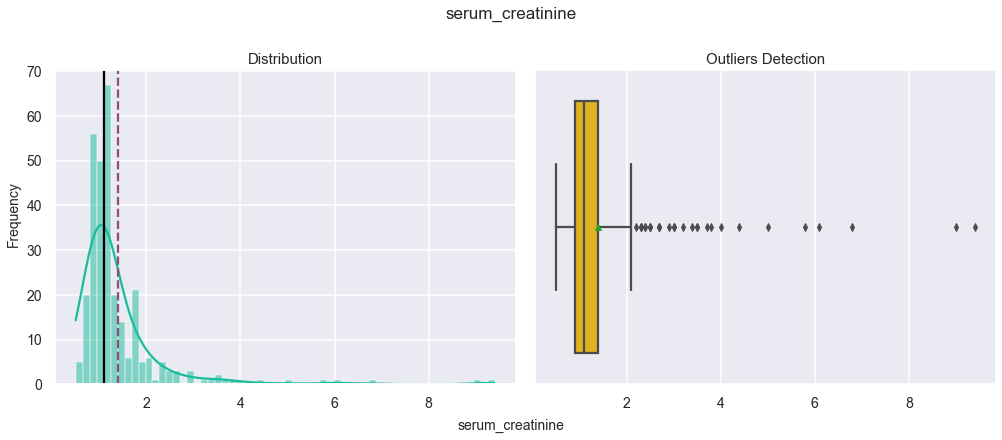

In [22]:
#Get serum_creatinine distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("serum_creatinine", fontsize=17)
fig.text(0.5, 0.0016, 'serum_creatinine', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='serum_creatinine', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['serum_creatinine']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['serum_creatinine']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['serum_creatinine'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

### Observations:

* The serum creatinine levels of patients are generally distributed exponentioally and skwed to the right; the mean is greater than the median
* The 25th to 75th percentile of serum creatinine of patients are with 1 but there are outliers in the maximum axis

In [3]:
#To find out the skewness and kurtosis of serum sodium
print('skewness-kurtosis all: {}'.format(heart_records_data['serum_creatinine'].kurt()))

skewness-kurtosis all: 25.828238661132016


**The serum creatinine of the patients is deeply skewed to the right, depicting an exponential distribution; since the kurtosis has an excess of 22.83, it is also leptokurtically distributed**

### Characteristics of patients within different age brackets

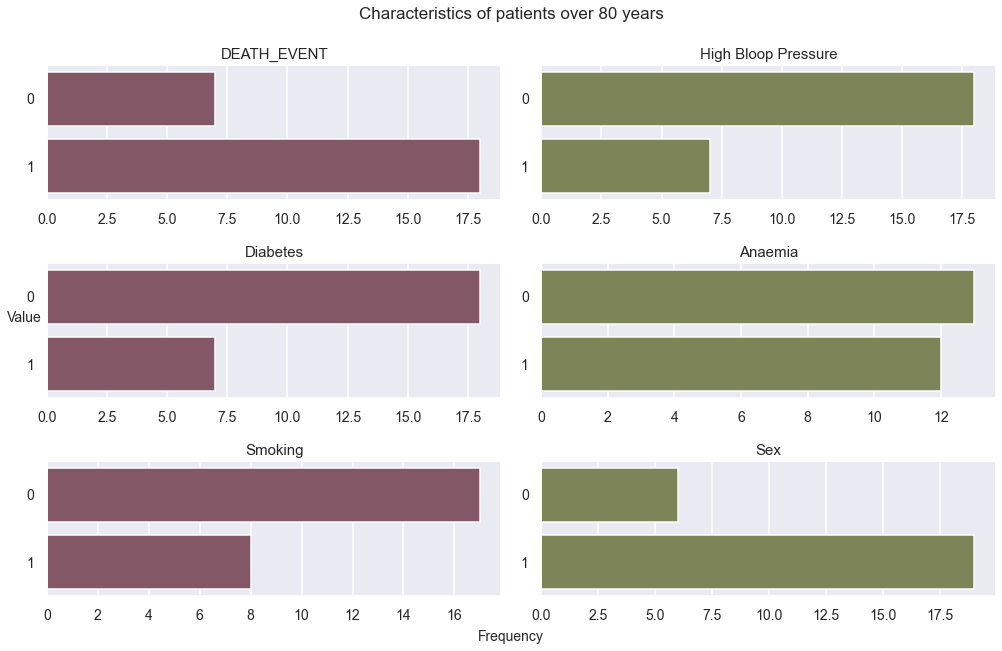

In [5]:
#Analysis of health records of patients over 80 years
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Characteristics of patients over 80 years", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='horizontal', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['DEATH_EVENT'], color= '#8C4F63',ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['high_blood_pressure'], color='#828C4F', ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['diabetes'], color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['anaemia'], color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['smoking'], color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['sex'], color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("DEATH_EVENT",fontdict={'fontsize': fontsize})
ax2.set_title("High Bloop Pressure",fontdict={'fontsize': fontsize})
ax3.set_title("Diabetes",fontdict={'fontsize': fontsize})
ax4.set_title("Anaemia",fontdict={'fontsize': fontsize})
ax5.set_title("Smoking",fontdict={'fontsize': fontsize})
ax6.set_title("Sex",fontdict={'fontsize': fontsize})


fig.tight_layout()
fig.show()

### Observations:

* Patients above 80 years old recorded low number of smokers, diabetics, less than 45 % of them have high blood pressure of which, 66 % of these patients are females; however, 92 % of patients above 80 years are anaemic and 7.7 % deaths were recorded
* High percentage of anaemic cases may be due to their ages

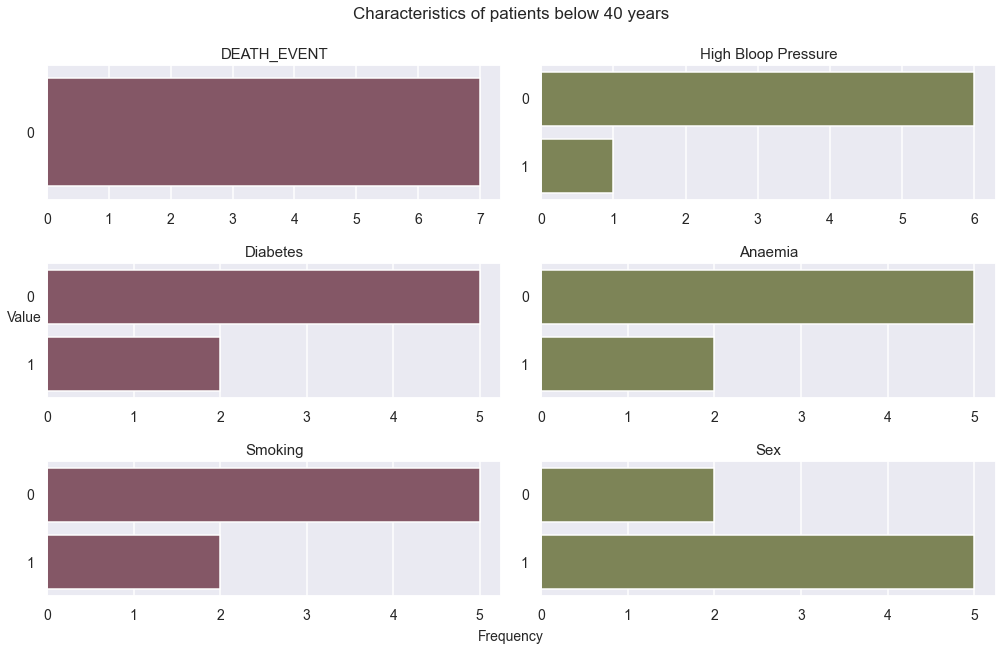

In [6]:
#Analysis of health records of patients below 40 years
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Characteristics of patients below 40 years", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='horizontal', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=heart_records_data[heart_records_data.age <= 40]['DEATH_EVENT'], color= '#8C4F63',ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=heart_records_data[heart_records_data.age <= 40]['high_blood_pressure'], color='#828C4F', ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=heart_records_data[heart_records_data.age <= 40]['diabetes'], color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=heart_records_data[heart_records_data.age <= 40]['anaemia'], color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=heart_records_data[heart_records_data.age <= 40]['smoking'], color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=heart_records_data[heart_records_data.age <= 40]['sex'], color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("DEATH_EVENT",fontdict={'fontsize': fontsize})
ax2.set_title("High Bloop Pressure",fontdict={'fontsize': fontsize})
ax3.set_title("Diabetes",fontdict={'fontsize': fontsize})
ax4.set_title("Anaemia",fontdict={'fontsize': fontsize})
ax5.set_title("Smoking",fontdict={'fontsize': fontsize})
ax6.set_title("Sex",fontdict={'fontsize': fontsize})


fig.tight_layout()
fig.show()

### Observations:

* Patients below 40 years old have more population of females, have significantly low number of high blood pressure cases (17%),60% of them are non-smokers, non-diabetic, and non-anaemic. There has also been no recorded deaths. 
* The fact that they are younger and probably involved in more physical activities than those above 80 years must have been contributing factors to this trend

## Bivariant Analysis